<a href="https://colab.research.google.com/github/Justyasir123/CNN_MNIST_PROJECT/blob/main/CNN_project_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT: Handwritten Digit Classification using CNN in TensorFlow**

# **1. Introduction & Relevance of the Project**
Handwritten digit classification is a fundamental problem in machine learning and deep learning. It
serves as an excellent introduction to Convolutional Neural Networks (CNNs), a type of deep learning
model that excels in image classification tasks. The ability of a computer to recognize handwritten
digits is widely used in applications like postal mail sorting, bank check verification, and digit
recognition on touch-based devices.
This project will help students understand the essential concepts of CNNs, image processing, and
model training using TensorFlow and Keras. By working on this project, students will gain hands-on
experience in building and evaluating deep learning models, an essential skill in modern AI
applications.

# **2. Project Objective**
Students are required to build a simple Convolutional Neural Network (CNN) model to classify
handwritten digits from the famous MNIST dataset. The goal is to train a model that can accurately
predict digits (0-9) based on input images.

**Step 1: Dataset Understanding and Preprocessing**

IMPORTING THE DEPENDENCIES

In [7]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

Load the MNIST dataset using TensorFlow/Keras.

In [8]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

Understand the dataset (60,000 training images and 10,000 test images, each of size 28x28
pixels, grayscale).

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_test.shape

(10000, 28, 28)

Normalize pixel values to the range [0,1] for better model performance.

In [11]:
X_train=X_train/255

In [12]:
X_test=X_test/255

Reshape the input data to fit into a CNN model.

In [13]:
X_train=X_train.reshape(-1,28,28,1)
X_test=X_test.reshape(-1,28,28,1)

**Step 2: Building the CNN Model**

**Define a CNN architecture with the following layers:**
- Convolutional Layer (to extract image features)
- Pooling Layer (to reduce spatial dimensions)
- Flatten Layer (to convert 2D data to 1D)
- Fully Connected (Dense) Layers
- Output Layer (using Softmax activation for classification)

In [58]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1))),
model.add(layers.MaxPooling2D((2,2))),

model.add(layers.Conv2D(64,(3,3),activation='relu')),
model.add(layers.MaxPooling2D(2,2)),

model.add(layers.Conv2D(64,(3,3),activation='relu')),
model.add(layers.MaxPooling2D(2,2)),

# model.add(layers.Conv2D(32,(3,3),activation='relu')),
# model.add(layers.MaxPooling2D(2,2)),

model.add(layers.Flatten()),
model.add(layers.Dense(64,activation='relu')),
model.add(layers.Dense(10,activation='softmax'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Compile the model with an appropriate loss function, optimizer, and evaluation metric.**

In [59]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Step 3: Training the Model**

- Split the dataset into training and validation sets.
- Train the model on the training dataset.
- Monitor accuracy and loss over epochs.

In [60]:
history=model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8378 - loss: 0.5086 - val_accuracy: 0.9672 - val_loss: 0.1059
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9724 - loss: 0.0909 - val_accuracy: 0.9774 - val_loss: 0.0719
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9816 - loss: 0.0592 - val_accuracy: 0.9796 - val_loss: 0.0669
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9863 - loss: 0.0456 - val_accuracy: 0.9818 - val_loss: 0.0625
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9827 - val_loss: 0.0562
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9815 - val_loss: 0.0630
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9931 - loss: 0.0207 - val_accuracy: 0.9857 - val_loss: 0.0513
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9930 - loss: 0.02

**Step 4: Evaluating the Model**
- Evaluate model performance on the test dataset.

In [61]:
test_accuracy=model.evaluate(X_test,y_test)
test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9833 - loss: 0.0601


[0.049103401601314545, 0.9873999953269958]

- Generate accuracy and loss plots.


In [62]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

**ACCURACY PLOT**

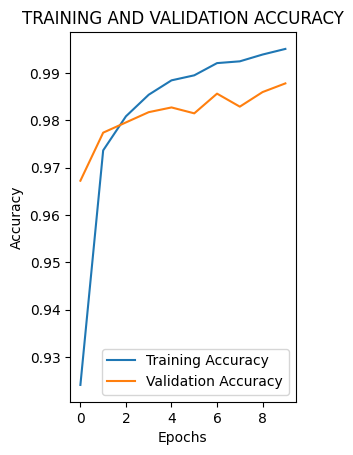

In [63]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("TRAINING AND VALIDATION ACCURACY")
plt.legend()

**LOSS PLOT**

Text(0.5, 1.0, 'LOSS OF TRAINING AND VALIDATION')

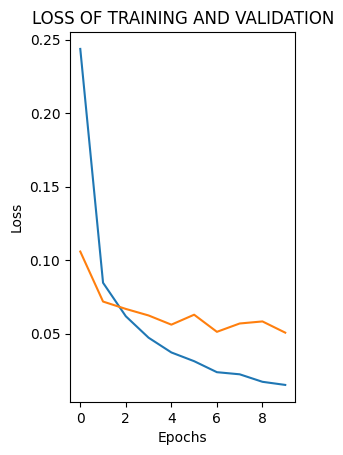

In [64]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label="Training Loss")
plt.plot(history.history['val_loss'],label="Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("LOSS OF TRAINING AND VALIDATION")

**SAVE THE MODEL FILE**

In [65]:
model.save('digit_cnn_model.h5')

**Test the model on some sample handwritten digits**

In [66]:
sample_images=X_test[:5]
sample_label=y_test[:5]
predictions=model.predict(sample_images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step


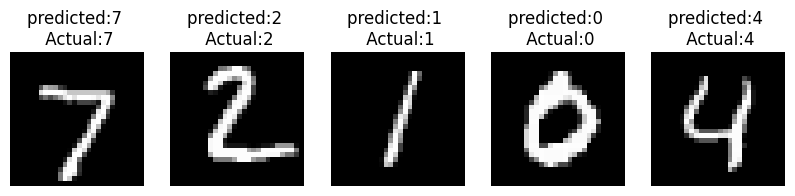

In [68]:
plt.figure(figsize=(10,5))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(sample_images[i].reshape(28,28),cmap='gray')
  plt.title(f"predicted:{np.argmax(predictions[i])} \n Actual:{sample_label[i]}")
  plt.axis('off')
plt.show()

# **SUMMARY:**

***From the given project on "Handwritten Digit Classification using CNN in TensorFlow", it can be analysed that:***
- ***The CNN model achieved a test accuracy of over 98%, indicating strong performance in classifying handwritten digits.***
- ***The accuracy and loss plots showed a consistent improvement over epochs with minimal overfitting.***
- ***Testing on sample images demonstrated the model's ability to generalize well.***

***Afterall, Visualization of predictions on sample images provided insights into model performance.Fortunately, predictions were perfectly predicted.***